# Black Friday Sales Prediction

#### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape,test.shape

((550068, 12), (233599, 11))

In [4]:
train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [5]:
combined = pd.concat([train,test],ignore_index=True)
combined.shape

(783667, 12)

In [6]:
combined.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
combined.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [8]:
# Describe()
combined.describe(include='all')

# popular product id: P00265242
# Frequency of Buying is More for males
# Most buying age is 26-35 
# Most of the buyers are coming from city category B
# On avg people stay for 1 year in the current city
# Min purchase is 12 dollars & max is 23961 dollars 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667,783667,783667,783667.000000,783667,783667,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
unique,NaN,3677,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,2709,590031,313015,NaN,329739,276425,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.079300,NaN,NaN,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,NaN,NaN,NaN,6.522206,NaN,NaN,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [9]:
plt.rcParams['figure.figsize']=[15,12]

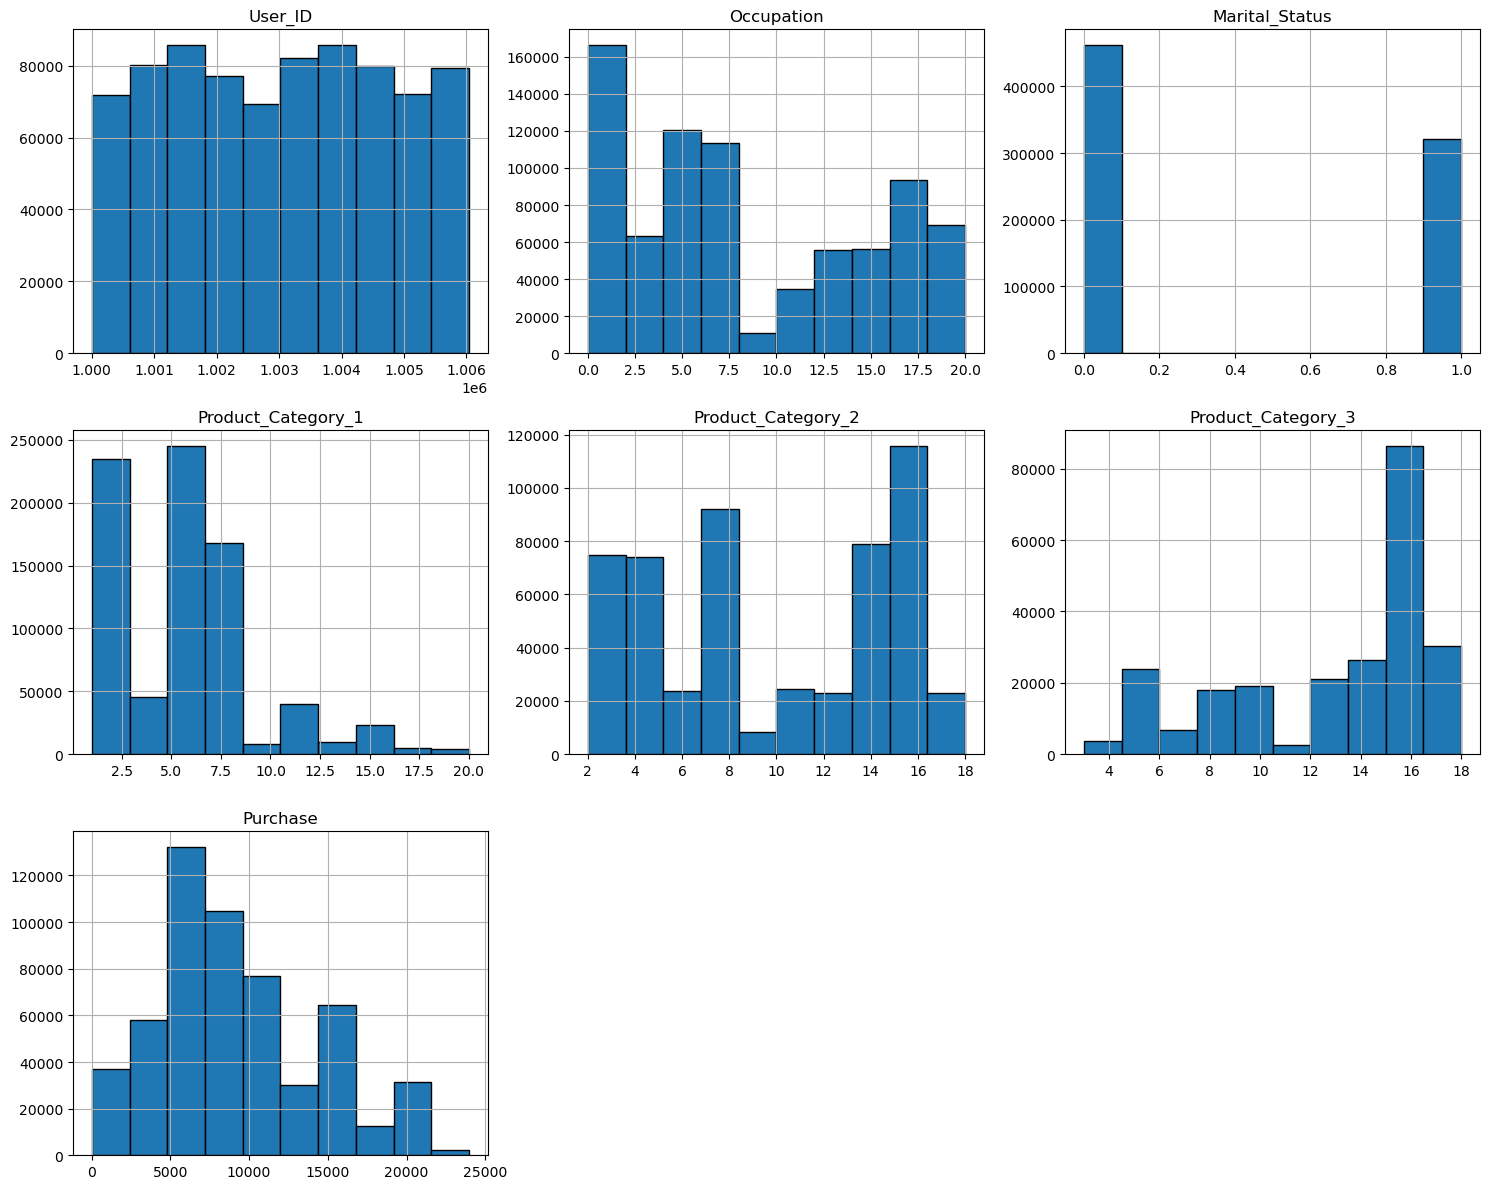

In [10]:
combined.hist(edgecolor = 'black')
plt.tight_layout()
plt.show()

In [11]:
# Cat variables
combined.select_dtypes(include='O').columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

Index(['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00046742'], dtype='object')


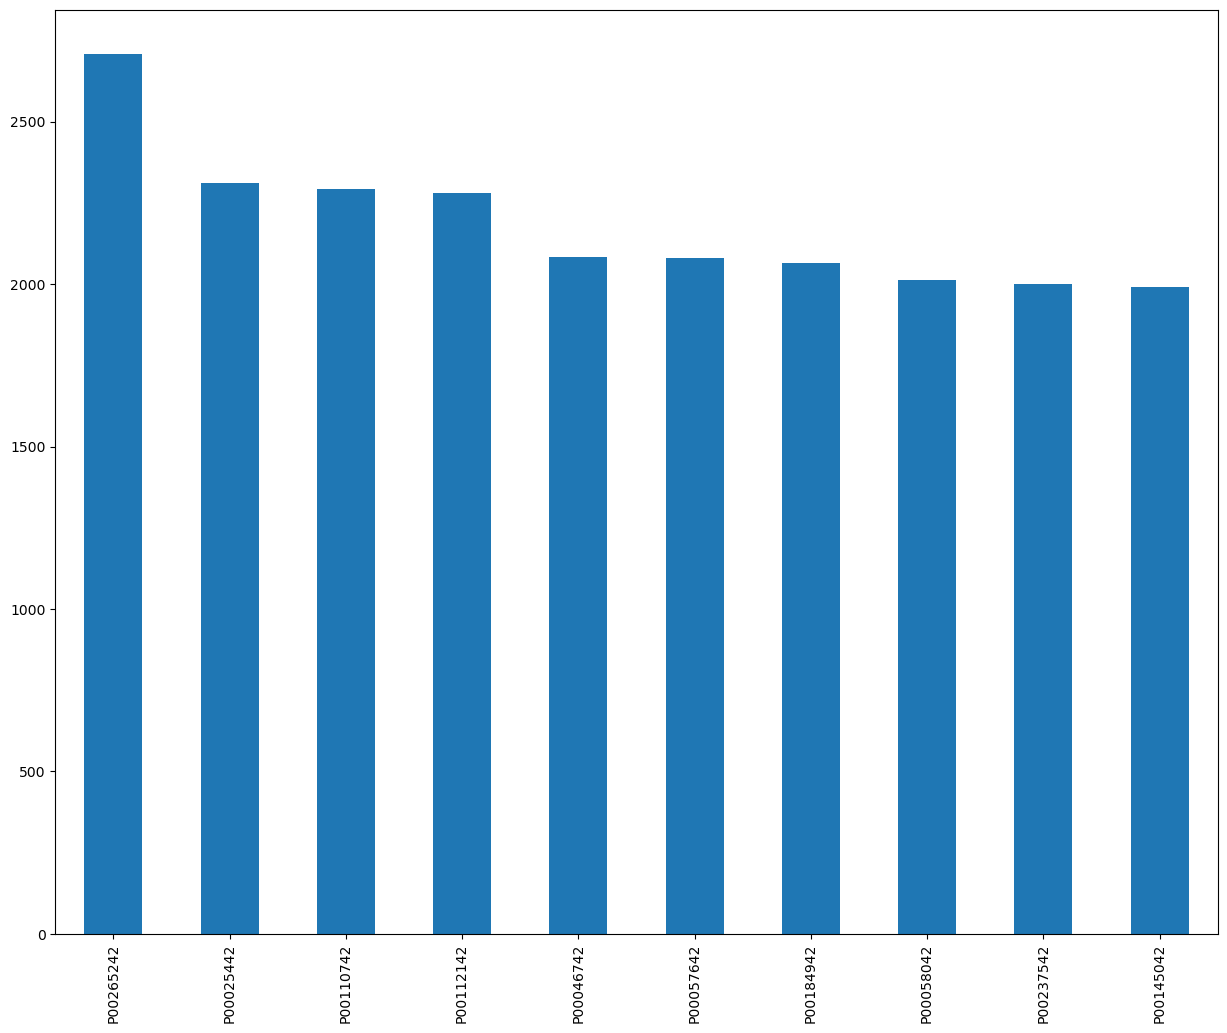

In [12]:
# Top 5 product IDs
print(combined.Product_ID.value_counts()[:5].index)
combined.Product_ID.value_counts()[:10].plot(kind='bar')
plt.show()

In [13]:
# We are grouping the top 5 product ids and others, because we have more product ids
# so we are binning to analysis a relation are not

In [14]:
prods = ['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00046742']

def prod_cat(x):
    if x in  prods:
        return('Top5')
    else:
        return('Others')
    
    
combined['Product_cat'] = combined.Product_ID.apply(prod_cat)

In [15]:
combined.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_cat
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,Others
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,Others


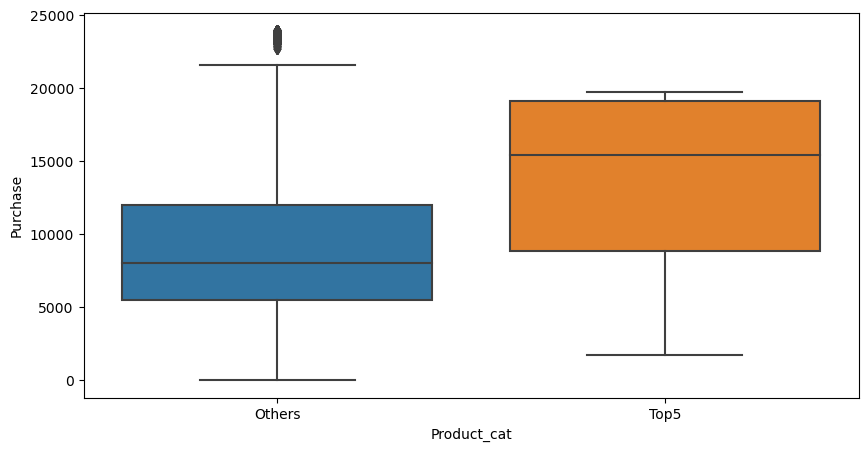

In [16]:
# Product_cat vs Tgt
plt.figure(figsize=(10,5))
sns.boxplot(combined.Product_cat,combined.Purchase)
plt.show()    # the median of top 5 is greater than others

<Figure size 1000x500 with 0 Axes>

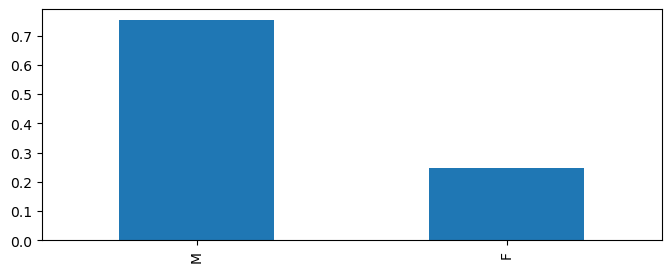

In [17]:
# Gender and age
plt.figure(figsize=(10,5))
plt.figure(figsize=(8,3))
combined.Gender.value_counts(normalize=True).plot(kind='bar')
plt.show()

26-35    0.399423
36-45    0.199988
18-25    0.181139
46-50    0.083298
51-55    0.069907
55+      0.039020
0-17     0.027223
Name: Age, dtype: float64


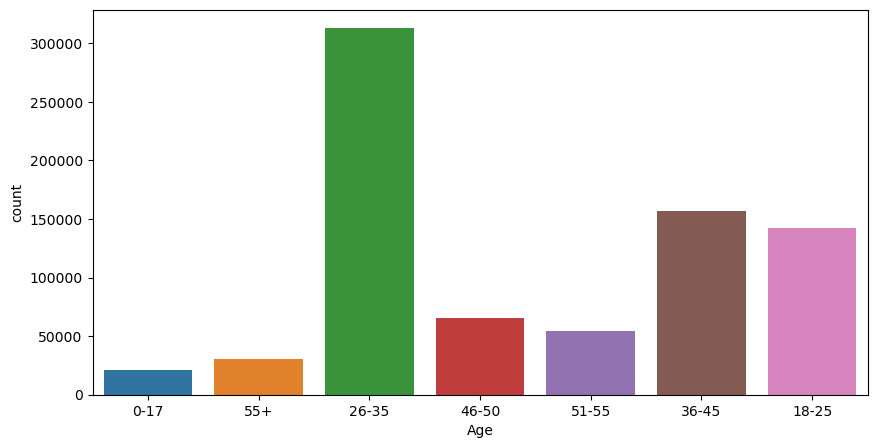

In [18]:
plt.figure(figsize=(10,5))
print(combined.Age.value_counts(normalize=True))
sns.countplot(combined.Age)
plt.show()

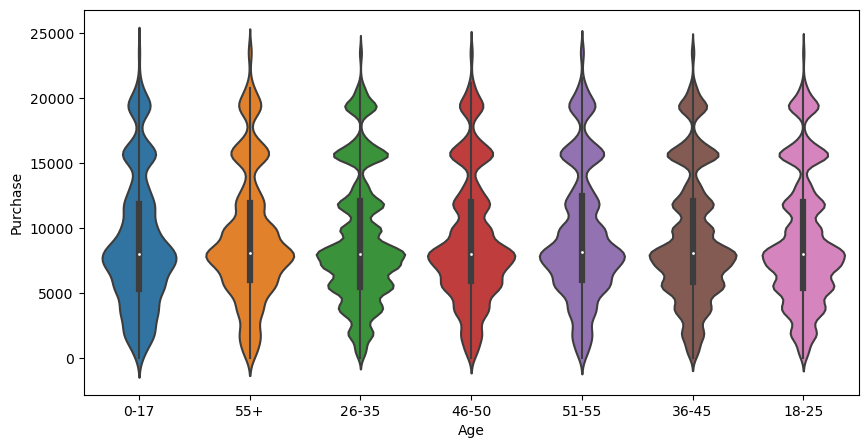

In [19]:
# Age with purchase
plt.figure(figsize=(10,5))
sns.violinplot(combined.Age,combined.Purchase)
plt.show()

In [20]:
combined.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [21]:
# Age into numbers
combined[['Age1','Age2']] = combined.Age.str.split('-',expand=True)

In [22]:
combined.Age1.unique()

array(['0', '55+', '26', '46', '51', '36', '18'], dtype=object)

In [23]:
combined['Age1'] = combined.Age1.str.strip('+').astype('float')

In [24]:
combined.Age1.unique()       # After stripping

array([ 0., 55., 26., 46., 51., 36., 18.])

In [25]:
combined.Age2.unique()

array(['17', None, '35', '50', '55', '45', '25'], dtype=object)

In [26]:
# Remove None
combined.loc[combined.Age2.isnull(),'Age2']=55

In [27]:
combined.Age2 = combined.Age2.astype('float')

In [28]:
combined.loc[combined.Age1==0,'Age1']=17  # Changing zero from age1 to 17

In [29]:
# Avg age
combined['Avg_age'] = combined.loc[:,['Age1','Age2']].mean(axis=1)

In [30]:
combined.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_cat,Age1,Age2,Avg_age
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,Others,17.0,17.0,17.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,Others,17.0,17.0,17.0


In [31]:
combined.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Age2,Avg_age
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.042845,0.037751
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096315,0.097003
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.310985,0.312479
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.058715,0.060010
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.055427,0.054761
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.056934,0.056049
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.016670,0.015820
Age1,0.032621,0.096361,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,0.972661,0.993774
Age2,0.042845,0.096315,0.310985,0.058715,0.055427,0.056934,0.016670,0.972661,1.000000,0.992479
Avg_age,0.037751,0.097003,0.312479,0.060010,0.054761,0.056049,0.015820,0.993774,0.992479,1.000000


In [32]:
import scipy.stats as stats

In [33]:
teststast,pvalue  =stats.ttest_ind(combined.Avg_age,combined.Purchase)

In [34]:
teststast,pvalue 

(nan, nan)

In [35]:
# Stay in Current city
combined.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [36]:
combined.Stay_In_Current_City_Years = combined.Stay_In_Current_City_Years.str.strip('+').astype('int')

In [37]:
combined.Stay_In_Current_City_Years.unique()

array([2, 4, 3, 1, 0])

In [38]:
combined.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Product_cat',
       'Age1', 'Age2', 'Avg_age'],
      dtype='object')

In [39]:
combined.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [40]:
def prod_cat(x):
    if x in [5,8,1]:
        return('Top3')
    else:
        return('Others')

In [41]:
combined['Prod1'] = combined.Product_Category_1.apply(prod_cat)

In [42]:
# city category
#sns.boxplot(combined.City_Category,combined.Purchase)
combined.groupby('City_Category')['Purchase'].describe().T

City_Category,A,B,C
count,147720.000000,231173.000000,171175.000000
mean,8911.939216,9151.300563,9719.920993
std,4892.115238,4955.496566,5189.465121
min,12.000000,12.000000,12.000000
25%,5403.000000,5460.000000,6031.500000
50%,7931.000000,8005.000000,8585.000000
75%,11786.000000,11986.000000,13197.000000
max,23961.000000,23960.000000,23961.000000


In [43]:
# take the city cat and create the mean and medium of purchase
combined['Mean_tgt_city_wise']=combined.groupby('City_Category')['Purchase'].transform('mean')

In [44]:
combined['Median_tgt_city_wise']=combined.groupby('City_Category')['Purchase'].transform('median')

In [45]:
combined['Std_tgt_city_wise']=combined.groupby('City_Category')['Purchase'].transform('std')

In [46]:
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Age2,Avg_age,Mean_tgt_city_wise,Median_tgt_city_wise,Std_tgt_city_wise
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.042845,0.037751,0.015785,0.010401,0.013293
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096315,0.097003,0.036727,0.036149,0.036635
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.002498,-0.005557,0.016863,0.013177,0.015187
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.310985,0.312479,0.038985,0.036361,0.037928
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.058715,0.060010,-0.016402,-0.014246,-0.015455
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.055427,0.054761,-0.010589,-0.008975,-0.009869
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.056934,0.056049,-0.001323,-0.001077,-0.001211
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.016670,0.015820,0.063988,0.062708,0.063699
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,0.972661,0.993774,0.130025,0.121791,0.126747
Age2,0.042845,0.096315,-0.002498,0.310985,0.058715,0.055427,0.056934,0.016670,0.972661,1.000000,0.992479,0.099397,0.091891,0.096312


In [47]:
# user id
combined['Prod_wise_user_count']=combined.groupby('Product_ID')['User_ID'].transform('nunique')

In [48]:
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Age2,Avg_age,Mean_tgt_city_wise,Median_tgt_city_wise,Std_tgt_city_wise,Prod_wise_user_count
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.042845,0.037751,0.015785,0.010401,0.013293,0.004468
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096315,0.097003,0.036727,0.036149,0.036635,0.011603
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.002498,-0.005557,0.016863,0.013177,0.015187,0.001934
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.310985,0.312479,0.038985,0.036361,0.037928,-0.011130
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.058715,0.060010,-0.016402,-0.014246,-0.015455,-0.232861
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.055427,0.054761,-0.010589,-0.008975,-0.009869,-0.133294
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.056934,0.056049,-0.001323,-0.001077,-0.001211,-0.060464
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.016670,0.015820,0.063988,0.062708,0.063699,0.319679
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,0.972661,0.993774,0.130025,0.121791,0.126747,-0.022485
Age2,0.042845,0.096315,-0.002498,0.310985,0.058715,0.055427,0.056934,0.016670,0.972661,1.000000,0.992479,0.099397,0.091891,0.096312,-0.021757


In [49]:
# Product and Prodcut Cat 1 user count  

combined['Product_cat1_user_count']=combined.groupby(['Product_Category_1'])['User_ID'].transform('nunique')

In [50]:
# Purchase stats basis Product ID
combined['Mean_tgt_Prod_id']=combined.groupby('Product_ID')['Purchase'].transform('mean')
combined['Median_tgt_Prod_id']=combined.groupby('Product_ID')['Purchase'].transform('median')
combined['Std_tgt_Prod_id']=combined.groupby('Product_ID')['Purchase'].transform('std')
combined['Min_tgt_Prod_id']=combined.groupby('Product_ID')['Purchase'].transform('min')
combined['Max_tgt_Prod_id']=combined.groupby('Product_ID')['Purchase'].transform('max')

In [51]:
combined.shape

(783667, 27)

In [52]:
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Age2,...,Mean_tgt_city_wise,Median_tgt_city_wise,Std_tgt_city_wise,Prod_wise_user_count,Product_cat1_user_count,Mean_tgt_Prod_id,Median_tgt_Prod_id,Std_tgt_Prod_id,Min_tgt_Prod_id,Max_tgt_Prod_id
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.042845,...,0.015785,0.010401,0.013293,0.004468,-0.004643,0.006088,0.005956,-0.006442,0.002325,0.000092
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096315,...,0.036727,0.036149,0.036635,0.011603,-0.004310,0.019854,0.019313,0.016758,0.017985,0.019116
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.002498,...,0.016863,0.013177,0.015187,0.001934,0.002131,0.001146,0.001166,0.004391,0.001352,0.003594
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.310985,...,0.038985,0.036361,0.037928,-0.011130,-0.009130,0.003334,0.002429,-0.016393,0.004886,-0.007862
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.058715,...,-0.016402,-0.014246,-0.015455,-0.232861,-0.582848,-0.394862,-0.386475,-0.460197,-0.359263,-0.461568
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.055427,...,-0.010589,-0.008975,-0.009869,-0.133294,-0.052251,-0.250626,-0.251594,-0.301987,-0.255925,-0.297840
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.056934,...,-0.001323,-0.001077,-0.001211,-0.060464,0.160078,-0.028277,-0.041558,-0.028252,-0.029602,-0.035411
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.016670,...,0.063988,0.062708,0.063699,0.319679,0.028031,0.849659,0.839742,0.699741,0.735215,0.797802
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,0.972661,...,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,-0.048410,0.011143,-0.020177
Age2,0.042845,0.096315,-0.002498,0.310985,0.058715,0.055427,0.056934,0.016670,0.972661,1.000000,...,0.099397,0.091891,0.096312,-0.021757,-0.023594,0.016615,0.013970,-0.044186,0.014877,-0.015353


In [53]:
# Purchase stats user ID
combined['Mean_tgt_User_id']=combined.groupby('User_ID')['Purchase'].transform('mean')
combined['Median_tgt_User_id']=combined.groupby('User_ID')['Purchase'].transform('median')
combined['Std_tgt_User_id']=combined.groupby('User_ID')['Purchase'].transform('std')
combined['Min_tgt_User_id']=combined.groupby('User_ID')['Purchase'].transform('min')
combined['Max_tgt_User_id']=combined.groupby('User_ID')['Purchase'].transform('max')

In [54]:
pd.set_option('display.max_columns',None)

In [55]:
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Age2,Avg_age,Mean_tgt_city_wise,Median_tgt_city_wise,Std_tgt_city_wise,Prod_wise_user_count,Product_cat1_user_count,Mean_tgt_Prod_id,Median_tgt_Prod_id,Std_tgt_Prod_id,Min_tgt_Prod_id,Max_tgt_Prod_id,Mean_tgt_User_id,Median_tgt_User_id,Std_tgt_User_id,Min_tgt_User_id,Max_tgt_User_id
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.042845,0.037751,0.015785,0.010401,0.013293,0.004468,-0.004643,0.006088,0.005956,-0.006442,0.002325,0.000092,0.014107,0.020833,0.035780,-0.011002,0.018201
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096315,0.097003,0.036727,0.036149,0.036635,0.011603,-0.004310,0.019854,0.019313,0.016758,0.017985,0.019116,0.064003,0.053898,0.051473,-0.012964,0.019097
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.002498,-0.005557,0.016863,0.013177,0.015187,0.001934,0.002131,0.001146,0.001166,0.004391,0.001352,0.003594,0.017561,0.016503,0.008029,0.018911,-0.013980
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.310985,0.312479,0.038985,0.036361,0.037928,-0.011130,-0.009130,0.003334,0.002429,-0.016393,0.004886,-0.007862,-0.000847,0.011550,-0.019182,0.015130,0.030536
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.058715,0.060010,-0.016402,-0.014246,-0.015455,-0.232861,-0.582848,-0.394862,-0.386475,-0.460197,-0.359263,-0.461568,-0.113473,-0.129816,-0.015519,-0.034221,0.043594
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.055427,0.054761,-0.010589,-0.008975,-0.009869,-0.133294,-0.052251,-0.250626,-0.251594,-0.301987,-0.255925,-0.297840,-0.041100,-0.052731,-0.002983,-0.017086,0.038608
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.056934,0.056049,-0.001323,-0.001077,-0.001211,-0.060464,0.160078,-0.028277,-0.041558,-0.028252,-0.029602,-0.035411,0.033844,0.025033,0.035248,-0.012696,0.039088
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.016670,0.015820,0.063988,0.062708,0.063699,0.319679,0.028031,0.849659,0.839742,0.699741,0.735215,0.797802,0.322415,0.296645,0.179935,0.057013,0.059118
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,0.972661,0.993774,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,-0.048410,0.011143,-0.020177,0.046381,0.051524,-0.004581,0.007841,0.055318
Age2,0.042845,0.096315,-0.002498,0.310985,0.058715,0.055427,0.056934,0.016670,0.972661,1.000000,0.992479,0.099397,0.091891,0.096312,-0.021757,-0.023594,0.016615,0.013970,-0.044186,0.014877,-0.015353,0.052273,0.051639,-0.002547,-0.000071,0.074831


In [56]:
combined.shape

(783667, 32)

In [57]:
combined['Prod_age_bins'] = combined.groupby('Product_ID')['Age'].transform('nunique')

In [58]:
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Age2,Avg_age,Mean_tgt_city_wise,Median_tgt_city_wise,Std_tgt_city_wise,Prod_wise_user_count,Product_cat1_user_count,Mean_tgt_Prod_id,Median_tgt_Prod_id,Std_tgt_Prod_id,Min_tgt_Prod_id,Max_tgt_Prod_id,Mean_tgt_User_id,Median_tgt_User_id,Std_tgt_User_id,Min_tgt_User_id,Max_tgt_User_id,Prod_age_bins
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.042845,0.037751,0.015785,0.010401,0.013293,0.004468,-0.004643,0.006088,0.005956,-0.006442,0.002325,0.000092,0.014107,0.020833,0.035780,-0.011002,0.018201,0.005111
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096315,0.097003,0.036727,0.036149,0.036635,0.011603,-0.004310,0.019854,0.019313,0.016758,0.017985,0.019116,0.064003,0.053898,0.051473,-0.012964,0.019097,0.000539
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.002498,-0.005557,0.016863,0.013177,0.015187,0.001934,0.002131,0.001146,0.001166,0.004391,0.001352,0.003594,0.017561,0.016503,0.008029,0.018911,-0.013980,0.001068
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.310985,0.312479,0.038985,0.036361,0.037928,-0.011130,-0.009130,0.003334,0.002429,-0.016393,0.004886,-0.007862,-0.000847,0.011550,-0.019182,0.015130,0.030536,-0.005074
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.058715,0.060010,-0.016402,-0.014246,-0.015455,-0.232861,-0.582848,-0.394862,-0.386475,-0.460197,-0.359263,-0.461568,-0.113473,-0.129816,-0.015519,-0.034221,0.043594,-0.094069
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.055427,0.054761,-0.010589,-0.008975,-0.009869,-0.133294,-0.052251,-0.250626,-0.251594,-0.301987,-0.255925,-0.297840,-0.041100,-0.052731,-0.002983,-0.017086,0.038608,-0.028719
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.056934,0.056049,-0.001323,-0.001077,-0.001211,-0.060464,0.160078,-0.028277,-0.041558,-0.028252,-0.029602,-0.035411,0.033844,0.025033,0.035248,-0.012696,0.039088,0.015765
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.016670,0.015820,0.063988,0.062708,0.063699,0.319679,0.028031,0.849659,0.839742,0.699741,0.735215,0.797802,0.322415,0.296645,0.179935,0.057013,0.059118,0.105734
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,0.972661,0.993774,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,-0.048410,0.011143,-0.020177,0.046381,0.051524,-0.004581,0.007841,0.055318,0.006853
Age2,0.042845,0.096315,-0.002498,0.310985,0.058715,0.055427,0.056934,0.016670,0.972661,1.000000,0.992479,0.099397,0.091891,0.096312,-0.021757,-0.023594,0.016615,0.013970,-0.044186,0.014877,-0.015353,0.052273,0.051639,-0.002547,-0.000071,0.074831,0.005037


In [59]:
combined.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [60]:
combined.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_cat,Age1,Age2,Avg_age,Prod1,Mean_tgt_city_wise,Median_tgt_city_wise,Std_tgt_city_wise,Prod_wise_user_count,Product_cat1_user_count,Mean_tgt_Prod_id,Median_tgt_Prod_id,Std_tgt_Prod_id,Min_tgt_Prod_id,Max_tgt_Prod_id,Mean_tgt_User_id,Median_tgt_User_id,Std_tgt_User_id,Min_tgt_User_id,Max_tgt_User_id,Prod_age_bins
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,Others,17.0,17.0,17.0,Others,8911.939216,7931.0,4892.115238,344,4195,11870.863436,13265.0,2205.413246,2648.0,13716.0,9545.514286,9946.0,4639.871552,612.0,19219.0,7
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,Others,17.0,17.0,17.0,Top3,8911.939216,7931.0,4892.115238,845,5836,16304.030981,15812.0,3340.288874,3880.0,19701.0,9545.514286,9946.0,4639.871552,612.0,19219.0,7


In [61]:
# combined.Occupation.value_counts(normalize=True)

In [62]:
# Drop the variabels
new = combined.drop(columns=['User_ID','Product_ID','Age1','Age2','Product_Category_2','Product_Category_3'],axis=1)

In [63]:
new.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Product_cat,Avg_age,Prod1,Mean_tgt_city_wise,Median_tgt_city_wise,Std_tgt_city_wise,Prod_wise_user_count,Product_cat1_user_count,Mean_tgt_Prod_id,Median_tgt_Prod_id,Std_tgt_Prod_id,Min_tgt_Prod_id,Max_tgt_Prod_id,Mean_tgt_User_id,Median_tgt_User_id,Std_tgt_User_id,Min_tgt_User_id,Max_tgt_User_id,Prod_age_bins
0,F,0-17,10,A,2,0,3,8370.0,Others,17.0,Others,8911.939216,7931.0,4892.115238,344,4195,11870.863436,13265.0,2205.413246,2648.0,13716.0,9545.514286,9946.0,4639.871552,612.0,19219.0,7
1,F,0-17,10,A,2,0,1,15200.0,Others,17.0,Top3,8911.939216,7931.0,4892.115238,845,5836,16304.030981,15812.0,3340.288874,3880.0,19701.0,9545.514286,9946.0,4639.871552,612.0,19219.0,7


In [64]:
new.shape

(783667, 27)

In [65]:
new.isnull().sum()[new.isnull().sum()!=0]

Purchase              233599
Mean_tgt_Prod_id          61
Median_tgt_Prod_id        61
Std_tgt_Prod_id          272
Min_tgt_Prod_id           61
Max_tgt_Prod_id           61
dtype: int64

In [66]:
new.loc[new.Mean_tgt_Prod_id.isnull()].head()
new.Mean_tgt_Prod_id.describe()

count    783606.000000
mean       9288.664174
std        4252.620075
min          36.675159
25%        6384.985258
50%        7787.689573
75%       12985.285971
max       21256.505495
Name: Mean_tgt_Prod_id, dtype: float64

In [67]:
#new.loc[new.Mean_Tgt_Prod_ID.isnull()].head()
val = new.Min_tgt_Prod_id.median()
new.loc[new.Min_tgt_Prod_id.isnull(),'Min_tgt_Prod_id'] = val

val1 = new.Mean_tgt_Prod_id.median()
new.loc[new.Mean_tgt_Prod_id.isnull(),'Mean_tgt_Prod_id'] = val1

val2 = new.Median_tgt_Prod_id.median()
new.loc[new.Median_tgt_Prod_id.isnull(),'Median_tgt_Prod_id'] = val2

val3 = new.Max_tgt_Prod_id.median()
new.loc[new.Max_tgt_Prod_id.isnull(),'Max_tgt_Prod_id'] = val3

val4 = new.Std_tgt_Prod_id.median()
new.loc[new.Std_tgt_Prod_id.isnull(),'Std_tgt_Prod_id'] = val4

In [68]:
new.shape

(783667, 27)

In [69]:
# Split the data in train and test

In [70]:
newtrain = new.iloc[0:train.shape[0]-1,:]
newtest =new.iloc[train.shape[0]:,:]
newtrain.shape,newtest.shape,train.shape,test.shape

((550067, 27), (233599, 27), (550068, 12), (233599, 11))

In [71]:
# Drop the purchase from newtest
newtest.drop('Purchase',axis=1,inplace=True)

In [72]:
newtrain.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [73]:
#Drop the age from newtrain and newtest
newtest.drop('Age',axis=1,inplace=True)
newtrain.drop('Age',axis=1,inplace=True)

In [74]:
from sklearn.preprocessing import StandardScaler
x = newtrain.drop('Purchase',axis=1)
y = newtrain.Purchase

In [75]:
x.select_dtypes(exclude="O").columns

Index(['Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Avg_age', 'Mean_tgt_city_wise',
       'Median_tgt_city_wise', 'Std_tgt_city_wise', 'Prod_wise_user_count',
       'Product_cat1_user_count', 'Mean_tgt_Prod_id', 'Median_tgt_Prod_id',
       'Std_tgt_Prod_id', 'Min_tgt_Prod_id', 'Max_tgt_Prod_id',
       'Mean_tgt_User_id', 'Median_tgt_User_id', 'Std_tgt_User_id',
       'Min_tgt_User_id', 'Max_tgt_User_id', 'Prod_age_bins'],
      dtype='object')

In [76]:
num_cols = ['Avg_age', 'Mean_tgt_city_wise',
       'Median_tgt_city_wise', 'Std_tgt_city_wise', 'Prod_wise_user_count',
       'Product_cat1_user_count', 'Mean_tgt_Prod_id', 'Median_tgt_Prod_id',
       'Std_tgt_Prod_id', 'Min_tgt_Prod_id', 'Max_tgt_Prod_id',
       'Mean_tgt_User_id', 'Median_tgt_User_id', 'Std_tgt_User_id',
       'Min_tgt_User_id', 'Max_tgt_User_id']

In [77]:
len(num_cols)

16

In [78]:
ss = StandardScaler()
for i in num_cols:
    x.loc[:,i] = ss.fit_transform(pd.DataFrame(newtrain.loc[:,i]))
    newtest.loc[:,i] = ss.transform(pd.DataFrame(newtest.loc[:,i]))

In [79]:
# One hot encoding
dummytrain = pd.get_dummies(x,drop_first=True)
dummytest = pd.get_dummies(newtest,drop_first=True)

In [80]:
dummytrain.shape,dummytest.shape

((550067, 26), (233599, 26))

In [81]:
y.shape

(550067,)

# Modelling

In [82]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

In [83]:
kfold = KFold(n_splits=5,shuffle= True,random_state = 0)
lr = LinearRegression()
pred = []
for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(dummytest))

finalpred = pd.DataFrame(pred).T.mean(axis=1)
sub = pd.DataFrame({'Purchase':finalpred,
                   "User_ID":test.User_ID,
                   'Product_ID':test.Product_ID})
sub.to_csv('s1.csv',index=False)

In [85]:
# rf = RandomForestRegressor()
# pred = []
# for train_index,test_index in kfold.split(dummytrain,y):
#     xtrain = dummytrain.iloc[train_index]
#     ytrain = y.iloc[train_index]
#     pred.append(rf.fit(xtrain,ytrain).predict(dummytest))

# finalpred = pd.DataFrame(pred).T.mean(axis=1)
# sub = pd.DataFrame({'Purchase':finalpred,
#                    "User_ID":test.User_ID,
#                    'Product_ID':test.Product_ID})
# sub.to_csv('s2.csv',index=False)

In [ ]:
gb = GradientBoostingRegressor()
pred = []
for train_index,test_index in kfold.split(dummytrain,y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))

finalpred = pd.DataFrame(pred).T.mean(axis=1)
sub = pd.DataFrame({'Purchase':finalpred,
                   "User_ID":test.User_ID,
                   'Product_ID':test.Product_ID})
sub.to_csv('s3.csv',index=False)